Importing necessary files, setting up initial values and model options, importing data from Chen data set

In [25]:
import os
os.getcwd()

'/home/andreas/Documents/SINTEF_code_review/cidemod/Checks/Cylinder'

In [1]:
from cideMOD import (
    CellParser,
    Problem,
    SolverCrashed,
    Trigger,
    ModelOptions,
)

import numpy as np
import os
import matplotlib.pyplot as plt
os.getcwd()
#Define Chen path
overwrite = True
case = "Chen_2020"
data_path = "../Data/data_{}".format(case)
params = "params_tuned.json"

C_rate = -1
I_app = -5*pi*r*r #C_rate * problem.Q
t_f = 3600 /abs(C_rate)*1.25
v_min = Trigger(2.5, "v")
#P4D modell
#Vi setter i=5 for å se om vi får noe nyttig
i=8
model_options = ModelOptions(mode='P4D', clean_on_exit=False,N_x=i,N_y=i,N_z=i)
cell = CellParser(params, data_path=data_path)

Capacidad Anodo: 5.090421993425188
Capacidad Catodo: 5.574712396434605
Capacidad Celda: 5.090421993425188


Define problem with cylindrical option

In [5]:
cyl = Problem(cell, model_options)
cyl.set_cell_state(1, 273 + 25, 273 + 25)
cyl.setup(mesh_engine="Cylinder") #OBS Cylinder reads thr cylinder_3.xml file in the LOCAL repo


Building simple cylindrical mesh from cylinder_3.xml
Actually the cylinder!
Finished building cylinder mesh
Building problem setup
 - Build cell parameters - Done 
 - Initializing state - Done 
 - Build variational formulation - Done 
Problem Setup finished.
Problem has 13224.0 dofs.



Define default problem mesh for comparison

In [2]:
normal = Problem(cell, model_options)
normal.set_cell_state(1, 273 + 25, 273 + 25)
normal.setup() #OBS Cylinder reads thr cylinder_3.xml file in the LOCAL repo


Building mesh for P4D problem with 3 components and 1536 nodes.
Finished building mesh
Building problem setup
 - Build cell parameters - Done 
 - Initializing state - Done 
 - Build variational formulation - Done 
Problem Setup finished.
Problem has 9964.0 dofs.



In [7]:
status = normal.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Voltage is 2.5 V at 3554.15 s 0	Time: 58min 48s



In [8]:
from dolfin import Timer,timings,timing, list_timings, TimingClear, TimingType

print(list_timings(TimingClear.keep, [TimingType.wall, TimingType.user]))

None
[MPI_AVG] Summary of timings                 |   reps    wall avg    wall tot     usr avg  usr tot
--------------------------------------------------------------------------------------------------
Adaptive TS                                  |    111      10.827      1201.8      10.814   1200.3
Apply (PETScMatrix)                          |   1307  9.4563e-06    0.012359  7.6511e-06     0.01
Apply (PETScVector)                          |  17974  5.1477e-06    0.092525  8.3454e-06     0.15
Assemble cells                               |  18004    0.034133      614.53     0.03411   614.11
Assemble exterior facets                     |   3112  0.00063197      1.9667   0.0006491     2.02
Assemble system                              |      8     0.01747     0.13976      0.0175     0.14
Basic TS                                     |    113      10.719      1211.2      10.706   1209.8
Build BoxMesh                                |      2   0.0012114   0.0024227           0        0
Build

In [9]:
status = cyl.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)
print(list_timings(TimingClear.keep, [TimingType.wall, TimingType.user]))

Solving ...
initializing solution
Voltage is 2.5 V at 3024.00 s 0	Time: 49min 48s

None[MPI_AVG] Summary of timings                 |   reps    wall avg    wall tot     usr avg  usr tot
--------------------------------------------------------------------------------------------------
Adaptive TS                                  |    196      11.291      2213.1      11.283   2211.5
Apply (PETScMatrix)                          |   2226  8.5458e-06    0.019023  4.4924e-06     0.01
Apply (PETScVector)                          |  30713  5.2683e-06     0.16181  6.5119e-06      0.2
Assemble cells                               |  30798    0.037797      1164.1    0.037787   1163.8
Assemble exterior facets                     |   5349  0.00071672      3.8337  0.00073285     3.92
Assemble system                              |     10    0.018851     0.18851       0.019     0.19
Basic TS                                     |    198      11.183      2214.1      11.176   2212.8
Build BoxMesh         

Text(0, 0.5, 'Voltage')

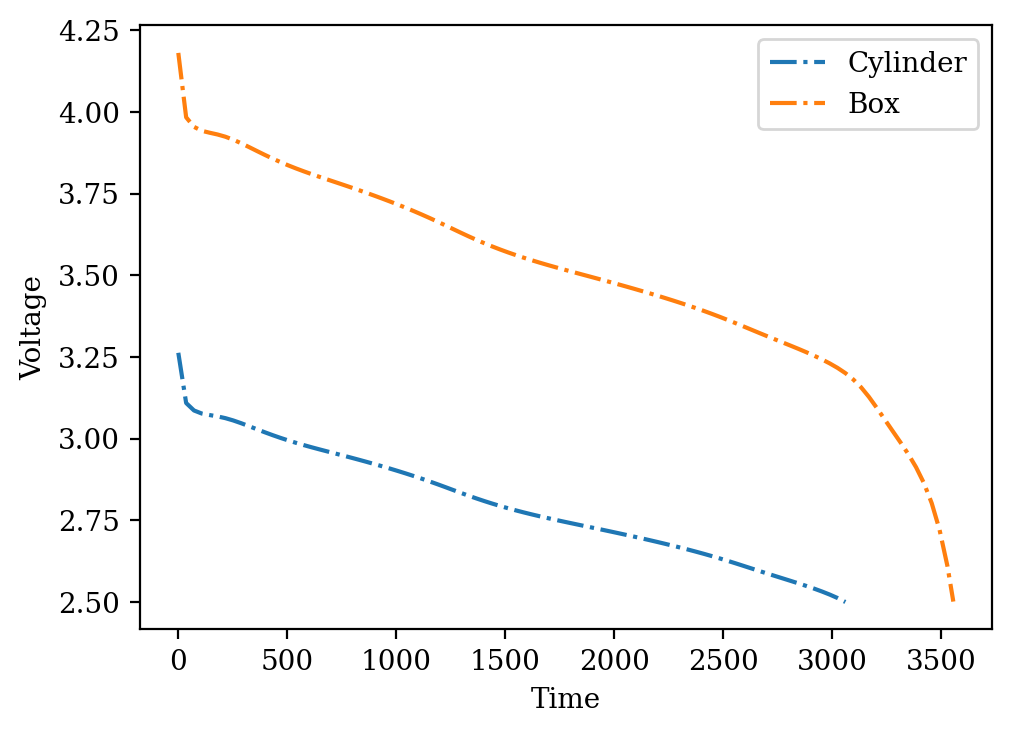

In [11]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(cyl.WH.global_var_arrays[0], cyl.WH.global_var_arrays[1], "-.")
ax1.plot(normal.WH.global_var_arrays[0], normal.WH.global_var_arrays[1], "-.")
ax1.legend(["Cylinder", "Box"], loc="best")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage")


In [3]:
status = normal.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

49.09s - Error inserting pydevd breaks.
Traceback (most recent call last):
  File "/home/andreas/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 328, in insert_pydevd_breaks
    for new_instruction in get_instructions_to_add(
  File "/home/andreas/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 102, in get_instructions_to_add
    Instr("LOAD_CONST", _pydev_stop_at_break, lineno=stop_at_line - 1),
  File "/home/andreas/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 171, in __init__
    self._set(name, arg, lineno)
  File "/home/andreas/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 239, in _set
    _check_lineno(lineno)
  File "/home/andreas/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendore

Solving ...
initializing solution


In [18]:
print(list_timings(TimingClear.keep, [TimingType.wall, TimingType.user]))

None[MPI_AVG] Summary of timings                 |   reps    wall avg    wall tot     usr avg  usr tot
--------------------------------------------------------------------------------------------------
Adaptive TS                                  |    202      12.114        2447      12.104   2445.1
Apply (PETScMatrix)                          |   3112  7.7139e-06    0.024006  6.4267e-06     0.02
Apply (PETScVector)                          |  39020  5.3694e-06     0.20952  5.8944e-06     0.23
Assemble cells                               |  41718    0.033697      1405.8    0.033689   1405.4
Assemble exterior facets                     |   7063  0.00068746      4.8555  0.00070508     4.98
Assemble system                              |     20    0.016103     0.32206       0.016     0.32
Basic TS                                     |    212      12.606      2672.6        12.6   2671.3
Build BoxMesh                                |      2   0.0012114   0.0024227           0        0
Build 